In [1]:
%matplotlib notebook
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import shapely
import time
import networkx as nx
import numpy as np
from tqdm import tqdm
import random
from copy import deepcopy


In [22]:

def crossing_index(crossing, candidate):
    """Check whether node allready exists on this place or generate new node name."""
    if candidate in crossing:
        return crossing[candidate]
    else:
        crossing[candidate] = len(crossing)
        return crossing[candidate]
        

def remove_useless_nodes(G):
    """
    Removes (in-place) nodes with degree 2 but preserves connectivity
    """
    G.remove_edges_from(G.selfloop_edges())
    print ("number of nodes", G.number_of_nodes())
    while list(dict(G.degree()).values()).count(2):
        print ("number of nodes deg 2", list(dict(G.degree()).values()).count(2))
        deg = dict(G.degree())
        for node in deg:       
            if deg[node] == 2:
                neigh = list(G.neighbors(node))  
                if len(neigh) == 1:
                    break
                G.add_edge(neigh[0], neigh[1])
                G.remove_node(node)
    return G


def largest_connected_graph(Graph):
    new_aus = deepcopy(Graph)
    new_aus = remove_useless_nodes(new_aus)
    G = None
    best = 0
    for x in nx.connected_component_subgraphs(new_aus):
        size = len(x.nodes)
        if size > best:
            best = size
            G = x
            
    return G

def mean(s):
    return sum(s) / len(s)

def estimate_ave_path_length(G, N):
    means = []
    running_mean = []
    nodes = list(G.nodes)
    nodes = random.sample(nodes, N)
    for node in tqdm(nodes):
        new = list(nx.single_source_dijkstra_path_length(G, node).values())
        means.append(mean(new))
        running_mean.append(mean(means))
    return running_mean[-1], running_mean

In [3]:
australia = nx.read_gpickle('databases/australia')
australia = remove_useless_nodes(australia)

2 [626, 18322]


In [7]:
newzealand = nx.read_gpickle('databases/newzealand')
newzealand = remove_useless_nodes(newzealand)

In [20]:
south_america = nx.read_gpickle('databases/southamerica')
south_america = remove_useless_nodes(south_america)

4341
1795
1568
2 [17195, 31837]
34
2


In [23]:
north_america = nx.read_gpickle('databases/northamerica')
north_america = remove_useless_nodes(north_america)

number of nodes 308178
number of nodes deg 2 236246
number of nodes deg 2 235337
number of nodes deg 2 223957
number of nodes deg 2 164841
number of nodes deg 2 161180
number of nodes deg 2 161146
number of nodes deg 2 161115
number of nodes deg 2 157129
number of nodes deg 2 147584
number of nodes deg 2 108060
number of nodes deg 2 98879
number of nodes deg 2 22971
number of nodes deg 2 3173
number of nodes deg 2 3048
number of nodes deg 2 2073
number of nodes deg 2 4


In [29]:
africa = nx.read_gpickle('databases/africa')
africa = remove_useless_nodes(africa)

number of nodes 169954
number of nodes deg 2 59306
number of nodes deg 2 58973
number of nodes deg 2 58121
number of nodes deg 2 50940
number of nodes deg 2 48062
number of nodes deg 2 44704
number of nodes deg 2 39135
number of nodes deg 2 38699
number of nodes deg 2 35579
number of nodes deg 2 30920
number of nodes deg 2 30884
number of nodes deg 2 23529
number of nodes deg 2 22937
number of nodes deg 2 20343
number of nodes deg 2 19353
number of nodes deg 2 18972
number of nodes deg 2 18812
number of nodes deg 2 18780
number of nodes deg 2 18755
number of nodes deg 2 17999
number of nodes deg 2 185
number of nodes deg 2 7


In [34]:
europa = nx.read_gpickle('databases/europa')
europa = remove_useless_nodes(europa)

number of nodes 66263
number of nodes deg 2 9686
number of nodes deg 2 8207
number of nodes deg 2 7337
number of nodes deg 2 4629
number of nodes deg 2 4458
number of nodes deg 2 2906
number of nodes deg 2 2874
number of nodes deg 2 71
number of nodes deg 2 27
number of nodes deg 2 4
number of nodes deg 2 3


In [ ]:
UK = nx.read_gpickle('databases/UK')
UK = remove_useless_nodes(UK)

# Higest degree node attack


number of nodes 56377


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.62it/s]


<IPython.core.display.Javascript object>


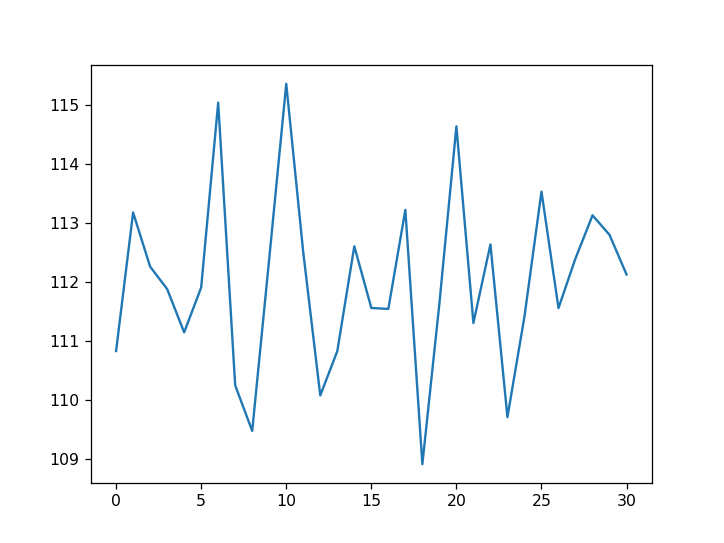

In [35]:
Graph = europa

G = largest_connected_graph(Graph)
highest_degree_list = sorted(G.degree, key = lambda x : x[1], reverse = True)

shortest_path = estimate_ave_path_length(G, 200)
listy = [shortest_path[0]]

for _ in range(30):
    G.remove_node(highest_degree_list.pop()[0])
    listy.append(estimate_ave_path_length(G, 200)[0])
    if not nx.is_connected(G):
        G = largest_connected_graph(G)
        
plt.figure()
plt.plot(listy)
plt.show()

# Random attack


number of nodes 56377


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.91it/s]


number of nodes 16799
number of nodes deg 2 19


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.53it/s]


number of nodes 16772
number of nodes deg 2 1


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.53it/s]


number of nodes 16764
number of nodes deg 2 14


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.01it/s]


number of nodes 16746
number of nodes deg 2 5


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.80it/s]


number of nodes 16738
number of nodes deg 2 6


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.71it/s]


number of nodes 16728
number of nodes deg 2 4


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.86it/s]


number of nodes 16720
number of nodes deg 2 8
number of nodes deg 2 2


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.93it/s]


number of nodes 16708
number of nodes deg 2 2


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.98it/s]


<IPython.core.display.Javascript object>


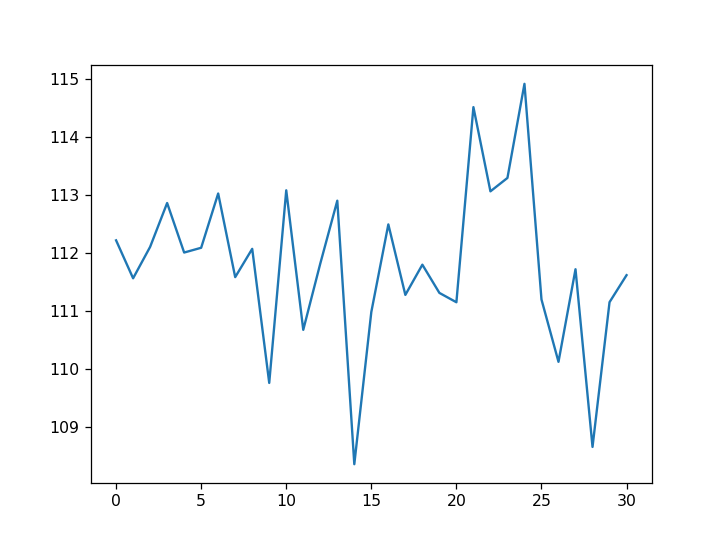

In [36]:
G = largest_connected_graph(Graph)
random_degree = list(G.degree)
np.random.shuffle(random_degree)

shortest_path = estimate_ave_path_length(G, 200)
listy = [shortest_path[0]]

for _ in range(30):
    G.remove_node(random_degree.pop()[0])
    listy.append(estimate_ave_path_length(G, 200)[0])
    if not nx.is_connected(G):
        G = largest_connected_graph(G)
        
plt.figure()
plt.plot(listy)
plt.show()

number of nodes 56377


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.15it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.07it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.67it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.24it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.49it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 40.64it/s]


number of nodes 16806
number of nodes deg 2 15
calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 33.00it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.43it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.52it/s]


number of nodes 12253
number of nodes deg 2 7
calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 33.08it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.41it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.56it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.48it/s]


number of nodes 12241
number of nodes deg 2 11
calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 57.41it/s]


number of nodes 12228
number of nodes deg 2 2
calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 50.60it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 72.33it/s]


number of nodes 8158
number of nodes deg 2 1
calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 63.70it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 62.45it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 59.27it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 64.01it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 63.07it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 64.34it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 64.02it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 61.26it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 61.55it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 62.15it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 62.76it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 59.83it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 60.11it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 62.15it/s]


calculating betweenness


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 64.01it/s]


<IPython.core.display.Javascript object>


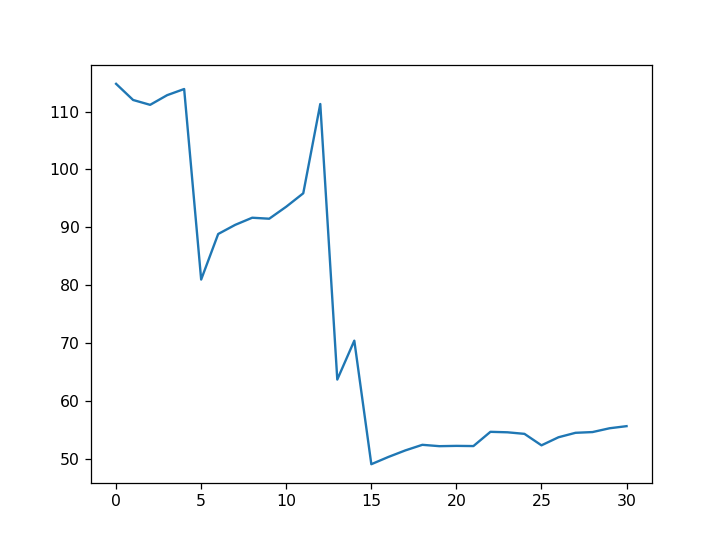

In [37]:
def get_highest_betweenness(G):
    print ("calculating betweenness")
    betweenness = nx.betweenness_centrality(G, k=100)
    bet = [[a,b] for b,a in betweenness.items()]
    bet.sort(reverse=True)
    return bet[0][1]

G = largest_connected_graph(Graph)

shortest_path = estimate_ave_path_length(G, 200)
listy = [shortest_path[0]]

for _ in range(30):
    G.remove_node(get_highest_betweenness(G))
    listy.append(estimate_ave_path_length(G, 200)[0])
    if not nx.is_connected(G):
        G = largest_connected_graph(G)
        
  
        
plt.figure()
plt.plot(listy)
plt.show()

<IPython.core.display.Javascript object>


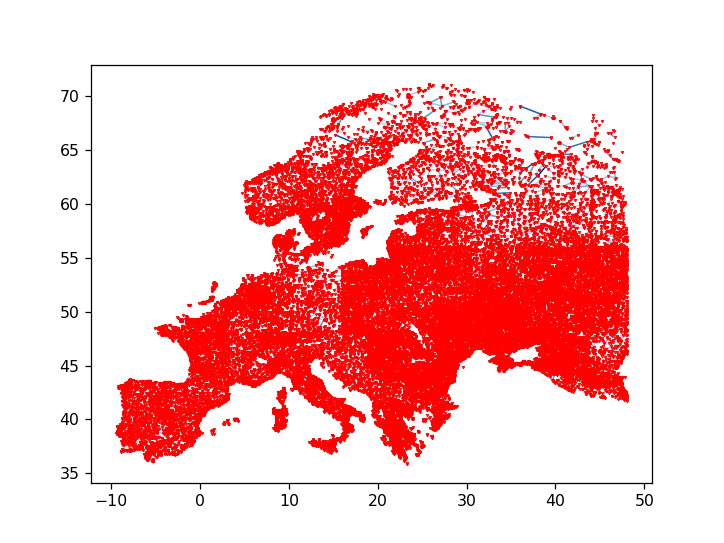

In [42]:
           
def plot_graph(G):
    """Plot networkx graph. Whereby position is given by coords attribute"""
    plt.figure()
    # list of all edges
    edges = [(u,v) for (u,v,d) in G.edges(data=True)]
    # positions for all nodes
    pos = nx.get_node_attributes(G, "coords")

    # nodes
    nx.draw_networkx_nodes(G,pos = pos, node_size=1, node_color='r', node_shape='v')

    # colour edges based on their weights
    edges, weights = zip(*nx.get_edge_attributes(G,'LENGTH_KM').items())
    nx.draw_networkx_edges(G, pos = pos, edgelist=edges, edge_color=weights, width=1, edge_cmap=plt.cm.Blues)
    #nx.draw(G, pos = pos)

    #small_df.plot()
    plt.show()
    
plot_graph(Graph)